# Regularized Methods

- Feature Scaling
- Test/Train split
- Ridge, LASSO, Elastic Net Regression methods

---

In a regular linear scenario, we start with a regular linear function.

$$ \hat y = b + ax_0$$



The mean square error of these predictions would be given by:

$$RSS(a, b) = \sum_{i = 1}^n(y_i -  (ax_i + b))^2$$

From this basic $MSE$ formulation, we can introduce some Regularized methods that add a *regularization term*  to the $MSE$.  We will look at three methods that offer slight variations on this term.

### Feature Scaling

To use these methods, we want to scale our data.  Many Machine Learning algorithms don't do well with data operating on very different scales.  Using the `MinMaxScaler` normalizes the data and brings the values between 0 and 1. The `StandardScaler` method is less sensitive to wide ranges of values and determines a distribution centered at zero. We will use both on our Ames housing data.  To begin, we need to select the numeric columns from the DataFrame so we can transform them only.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#get our data and select the numer
ames = pd.read_csv('data/ames_housing.csv', index_col='Id')
y = ames['SalePrice']
ames = ames.drop('SalePrice', axis = 1)

In [3]:
ames_numeric = ames.select_dtypes(include = 'int64')
ames_numeric.head()

#here we just select the numerinc columns cuz he's trying to show us how the scaling works.
#If I were actually doing this, I'd convert things like "MSSubClass" or any Year variable to a categorical.  Doesn't make 
#sense to scale those

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,706,0,150,856,...,548,0,61,0,0,0,0,0,2,2008
2,20,9600,6,8,1976,1976,978,0,284,1262,...,460,298,0,0,0,0,0,0,5,2007
3,60,11250,7,5,2001,2002,486,0,434,920,...,608,0,42,0,0,0,0,0,9,2008
4,70,9550,7,5,1915,1970,216,0,540,756,...,642,0,35,272,0,0,0,0,2,2006
5,60,14260,8,5,2000,2000,655,0,490,1145,...,836,192,84,0,0,0,0,0,12,2008


### Using the Scaler on a DataFrame

Below, we can compare the results of the two scaling transformations by passing a list of column names to the scaler.  Note the practice of initializing the object, fitting it, and transforming.  

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [5]:
std_scaled = StandardScaler()
minmax_scaled = MinMaxScaler()

In [6]:
cols = ames_numeric.columns

In [7]:
std_df = std_scaled.fit_transform(ames[[name for name in cols]])
minmax_df = minmax_scaled.fit_transform(ames[[name for name in cols]])

In [8]:
pd.DataFrame(std_df).head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.575425,-0.288653,-0.944591,-0.459303,...,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,1.171992,-0.288653,-0.641228,0.466465,...,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,0.073375,0.073480,0.651479,-0.517200,0.984752,0.830215,0.092907,-0.288653,-0.301643,-0.313369,...,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.499274,-0.288653,-0.061670,-0.687324,...,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,0.073375,0.375148,1.374795,-0.517200,0.951632,0.733308,0.463568,-0.288653,-0.174865,0.199680,...,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777


In [9]:
pd.DataFrame(minmax_df).head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.235294,0.033420,0.666667,0.500,0.949275,0.883333,0.125089,0.0,0.064212,0.140098,...,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50
1,0.000000,0.038795,0.555556,0.875,0.753623,0.433333,0.173281,0.0,0.121575,0.206547,...,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25
2,0.235294,0.046507,0.666667,0.500,0.934783,0.866667,0.086109,0.0,0.185788,0.150573,...,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50
3,0.294118,0.038561,0.666667,0.500,0.311594,0.333333,0.038271,0.0,0.231164,0.123732,...,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00
4,0.235294,0.060576,0.777778,0.500,0.927536,0.833333,0.116052,0.0,0.209760,0.187398,...,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50


### Fit a Linear Model on Scaled Data

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lm = LinearRegression()

In [12]:
y = np.log(y)

In [13]:
ames_numeric_scaled = std_scaled.fit_transform(ames[[name for name in cols]])

In [14]:
lm.fit(ames_numeric_scaled, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
predictions = lm.predict(ames_numeric_scaled)

In [17]:
mse = mean_squared_error(y, predictions)

In [18]:
rmse = np.sqrt(mse)
score = lm.score(ames_numeric_scaled, predictions)

In [19]:
print('R-squared score: {}'.format(score), '\nRMSE: {:.4f}'.format(rmse))

R-squared score: 1.0 
RMSE: 0.1449


### Splitting the Data 

As we have seen, we will tend to overfit the data if we use the entire dataset to determine the model.  To account for this, we will split our datasets into a **training set** to build our model on, and a **test set** to evaluate the performance of the model.  We have a handy sklearn method for doing this, who by default splits the data into 75% for training and 25% for testing.

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(ames_numeric_scaled, y)

In [22]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
pred = lm.predict(X_test)

In [24]:
mse = mean_squared_error(y_test, pred)

In [25]:
rmse = np.sqrt(mse)
rmse

0.14146505911071378

### Regularized Methods Comparison



In [26]:
crime = pd.read_csv('data/crime_data.csv', index_col = 'Unnamed: 0')

In [27]:
crime.head()

,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,...,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,ViolentCrimesPerPop
0,11980,3.10,12.47,21.44,10.93,11.33,11980,100.0,75122,89.24,...,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14,41.02
1,23123,2.82,11.01,21.30,10.48,17.18,23123,100.0,47917,78.99,...,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,127.56
2,29344,2.43,11.36,25.88,11.01,10.28,29344,100.0,35669,82.00,...,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85,218.59
3,16656,2.40,12.55,25.20,12.19,17.57,0,0.0,20580,68.15,...,20.6,14.5,0,0,2.04,88.71,56.70,90.17,96.24,306.64
5,140494,2.45,18.09,32.89,20.04,13.26,140494,100.0,21577,75.78,...,17.3,11.7,327,4,1.49,64.35,42.29,70.61,85.66,442.95


In [28]:
from sklearn.model_selection import train_test_split
crime.columns

Index(['population', 'householdsize', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome',
       'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst',
       'pctWRetire', 'medFamInc', 'perCapInc', 'NumUnderPov', 'PctPopUnderPov',
       'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed',
       'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu',
       'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv',
       'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par',
       'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom',
       'NumKidsBornNeverMar', 'PctKidsBornNeverMar', 'NumImmig',
       'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10',
       'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10',
       'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam',
       'PctLargHouseOccup', 'PersPerOccupHous', 'Pe

In [29]:
y = crime['ViolentCrimesPerPop']

In [30]:
X = crime.drop('ViolentCrimesPerPop', axis = 1)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# It's super important to split into test/train splits before you scale, otherwise you'll be scaling incorrectly.  Your largest values might end up in one of the buckets, so you shouldn't be scaling based on those large values in the bucket that doesn't contain those large values.

In [32]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [33]:
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)
predictions = lm.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
score = lm.score(X_test_scaled, y_test)
print('The r2 value is : {:.4f}'.format(score), '\nThe RMSE value is {:.4f}'.format(rmse))

The r2 value is : 0.1361 
The RMSE value is 525.7992


### Ridge Regression

$$RSS(w, b) = \sum_{i = 1} ^ N (y_i - (wx_i + b))^2 + \alpha \sum_{j = 1}^p w_j^2 $$

Many feature coefficients will be determined with small values.  Larger $\alpha$ means larger penalty, zero is base LinearRegression, and the default for sklearn's implementation is 1.0.

##  What Ridge does is penalize based on the size of residuals.  It sounds like you apply a constant penalty where the constant is supplied to the "alpha" argument.

## Alpha is an example of a "hyperparameter".

In [34]:
from sklearn.linear_model import Ridge

In [35]:
ridge_reg = Ridge(alpha = 1)

In [36]:
ridge_reg.fit(X_train_scaled, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [37]:
rpred = ridge_reg.predict(X_test_scaled)

In [38]:
rmse = np.sqrt(mean_squared_error(y_test, rpred))
score = ridge_reg.score(X_test_scaled, y_test)
print('The r2 value is : {:.4f}'.format(score), '\nThe RMSE value is {:.4f}'.format(rmse))

The r2 value is : 0.4340 
The RMSE value is 425.5682


In [39]:
np.sum(ridge_reg.coef_ != 0)

88

In [40]:
crime.shape

(1994, 89)

In [41]:
ridge_reg = Ridge(alpha = 20)
ridge_reg.fit(X_train_scaled, y_train)
rpred = ridge_reg.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, rpred))
score = ridge_reg.score(X_test_scaled, y_test)
print('The r2 value is : {:.4f}'.format(score), '\nThe RMSE value is {:.4f}'.format(rmse))

The r2 value is : 0.5534 
The RMSE value is 378.0472


### Lasso Regression

$$RSS(w, b) = \sum_{i = 1} ^ N (y_i - (wx_i + b))^2 + \alpha \sum_{j = 1}^p |w_j| $$

Now, we end up in effect setting variables with low influence to a coefficient of zero.  Compared to Ridge, we would use Lasso if there are only a few variables with substantial effects.

#  In Ridge, we're penaliIng by multiplying alpha times the square of the residuals.  Here, we're multiplying alpha by the abs. value of the residuals.  This will result in coefficients being zero (thereby completely getting rid of features). 

In [54]:
from sklearn.linear_model import Lasso

In [55]:
lasso_reg = Lasso(alpha = 2.0)

In [56]:
lasso_reg.fit(X_train_scaled, y_train)

Lasso(alpha=2.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [57]:
lpred = lasso_reg.predict(X_test_scaled)

In [58]:
rmse = np.sqrt(mean_squared_error(y_test, lpred))
score = ridge_reg.score(X_test_scaled, y_test)
print('The r2 value is : {:.4f}'.format(score), '\nThe RMSE value is {:.4f}'.format(rmse))

The r2 value is : 0.5534 
The RMSE value is 383.7434


In [59]:
np.sum(lasso_reg.coef_ != 0)

21

In [60]:
for e in sorted (list(zip(list(X), lasso_reg.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

	PctKidsBornNeverMar, 1897.551
	PctKids2Par, -960.859
	PctVacantBoarded, 404.513
	MalePctDivorce, 363.452
	PctForeignBorn, 252.033
	PctWorkMom, -173.270
	PctEmplManu, -164.691
	MedOwnCostPctIncNoMtg, -148.998
	PctHousOccup, -129.109
	pctUrban, 124.517
	RentQrange, 115.557
	pctWInvInc, -102.004
	MedYrHousBuilt, 97.971
	agePct16t24, -89.468
	PctLargHouseFam, 70.660
	agePct12t29, -56.793
	PersPerRentOccHous, 54.163
	pctWPubAsst, 41.677
	PctSameCity85, 26.705
	PctImmigRec10, 20.627
	pctWRetire, -1.993


# The above celll shows which features have the largest effect on the target variable.  Here, kids born out of wedlock is clearly the strongest predictor. 

### Elastic Net

$$RSS(w, b) = \sum_{i = 1} ^ N (y_i - (wx_i + b))^2 + r\alpha\sum_{i = 1}^n |w_j| + \frac{1-r}{2} \alpha \sum_{j = 1}^p w_j^2 $$



In [61]:
from sklearn.linear_model import ElasticNet

In [62]:
elastic_reg = ElasticNet(alpha = .05, l1_ratio=0.4)
elastic_reg.fit(X_train_scaled, y_train)
epred = elastic_reg.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, epred))
rmse

375.60175271523434

In [63]:
ridge_score = ridge_reg.score(X_test_scaled, y_test)
lasso_score = lasso_reg.score(X_test_scaled, y_test)
elastic_score = elastic_reg.score(X_test_scaled, y_test)

In [64]:
print("Ridge: {:.4f}".format(ridge_score), "\nLasso: {:.4f}".format(lasso_score),
      "\nElastic Net: {:.4f}".format(elastic_score))

Ridge: 0.5534 
Lasso: 0.5398 
Elastic Net: 0.5591


<IPython.core.display.Javascript object>


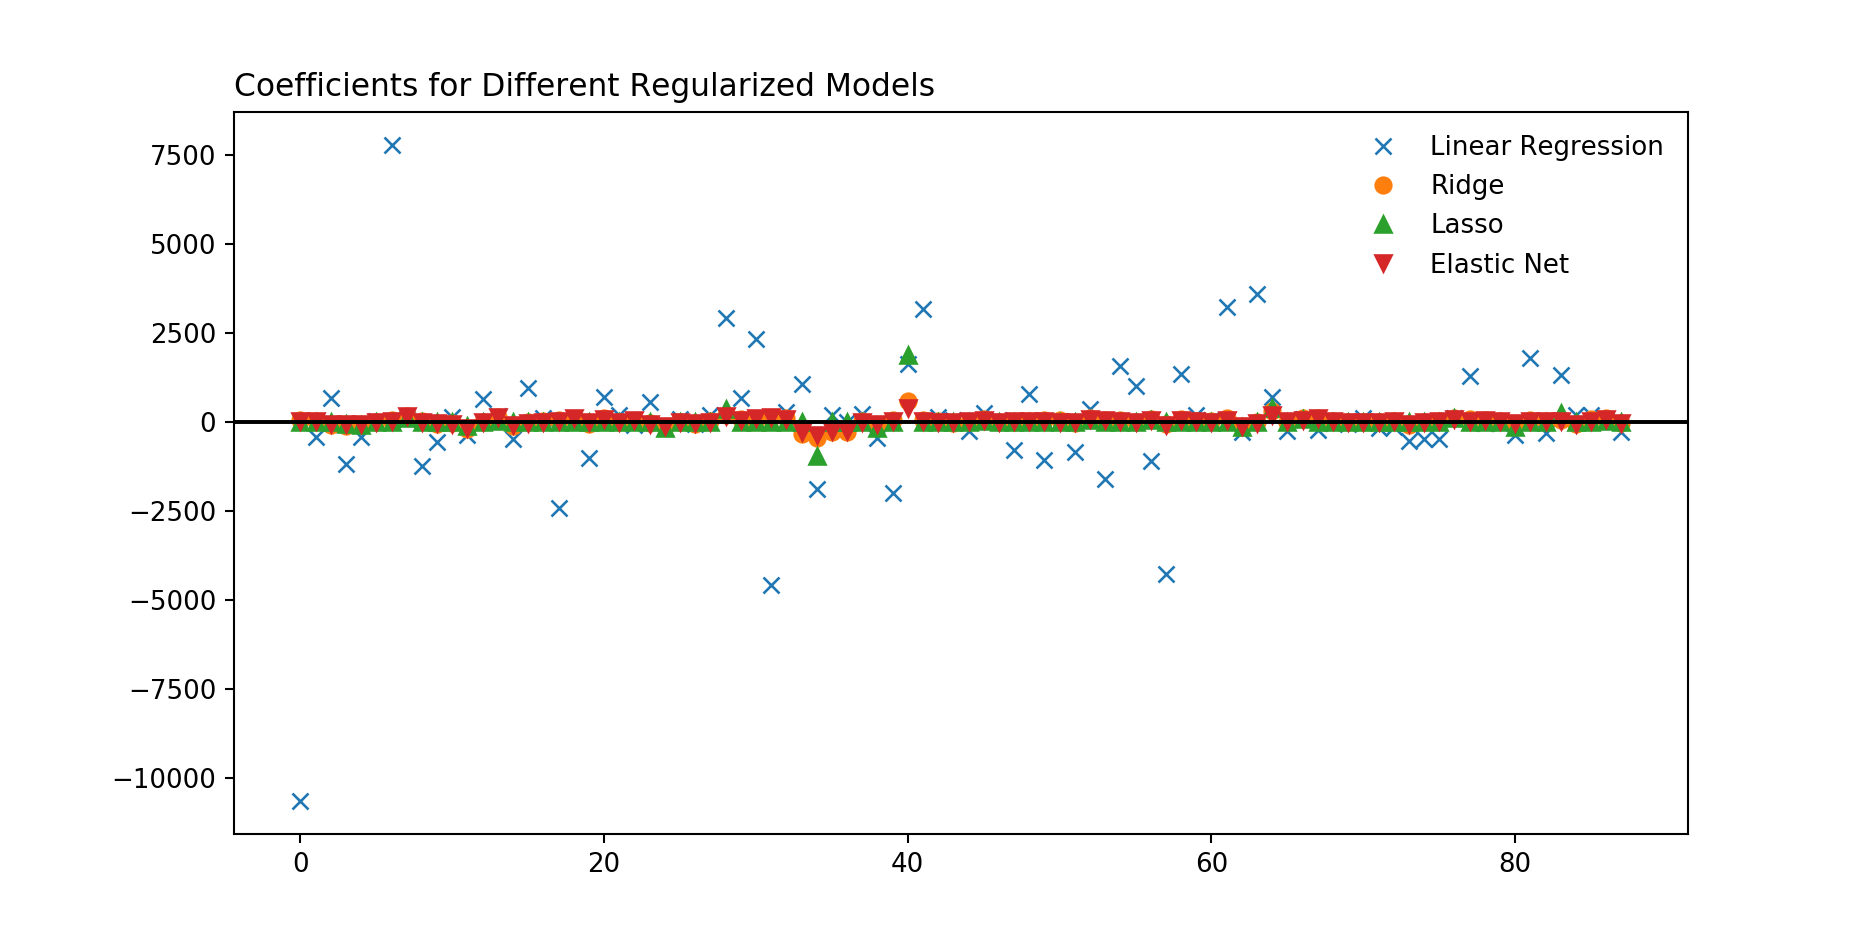

Text(0,1,'Coefficients for Different Regularized Models')

In [65]:
plt.figure(figsize = (10, 5))
plt.plot(lm.coef_, 'x', label = 'Linear Regression')
plt.plot(ridge_reg.coef_, 'o', label = 'Ridge')
plt.plot(lasso_reg.coef_, '^', label = 'Lasso')
plt.plot(elastic_reg.coef_, 'v', label = 'Elastic Net')
plt.axhline(color = 'black')
plt.legend(frameon = False, loc = 'best')
plt.title('Coefficients for Different Regularized Models', loc = 'left')

### PROBLEM

Return to your Ames Data.  We have covered a lot of ground today, so let's summarize the things we could do to improve the performance of our original model that compared the Above Ground Living Area to the Logarithm of the Sale Price.
<div class="alert alert-info" role="alert">
1. Clean data, drop missing values
2. Transform data, code variables using either ordinal values or OneHotEncoder methods
3. Create more features from existing features
4. Split our data into testing and training sets
6. Use  Polynomial regression to improve performance of model
</div>
Can you use some or all of these ideas to improve upon your initial model?

### Additional Resources

The last two lessons have pulled heavily from these resources.  I recommend them all strongly as excellent resources:

- SciKitLearn documentation on Regression: http://scikit-learn.org/stable/supervised_learning.html#supervised-learning

- Aurelien Geron, *Hands on Machine Learning with SciKitLearn and TensorFlow*

- James et. al, *An Introduction to Statistical Learning: With Applications in R*

- Philipp K. Janert, *Data Analysis with OpenSource Tools*

- University of Michigan Coursera Class on Machine Learning with SciKitLearn: https://www.coursera.org/learn/python-machine-learning

- Stanford University course on Machine Learning: https://www.coursera.org/learn/machine-learning